# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 566


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | tobruk
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | currumbin waters
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | tazacorte
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | wer
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | inongo
Processing Record 20 of Set 1 | la passe
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | tranovaho
City not found. Sk

Processing Record 39 of Set 4 | koumra
Processing Record 40 of Set 4 | vilyuysk
Processing Record 41 of Set 4 | meridian
Processing Record 42 of Set 4 | mount isa
Processing Record 43 of Set 4 | chonchi
Processing Record 44 of Set 4 | mil'kovo
Processing Record 45 of Set 4 | broken hill
Processing Record 46 of Set 4 | touros
Processing Record 47 of Set 4 | sinabang
Processing Record 48 of Set 4 | nova sintra
Processing Record 49 of Set 4 | newman
Processing Record 0 of Set 5 | nar'yan-mar
Processing Record 1 of Set 5 | cole harbour
Processing Record 2 of Set 5 | north battleford
Processing Record 3 of Set 5 | maradi
Processing Record 4 of Set 5 | hovd
Processing Record 5 of Set 5 | praia da vitoria
Processing Record 6 of Set 5 | puerto cabezas
Processing Record 7 of Set 5 | dhidhdhoo
Processing Record 8 of Set 5 | usinsk
Processing Record 9 of Set 5 | khanty-mansiysk
Processing Record 10 of Set 5 | saipan
Processing Record 11 of Set 5 | tateyama
Processing Record 12 of Set 5 | kudahuva

Processing Record 33 of Set 8 | tuzha
Processing Record 34 of Set 8 | fort mcmurray
Processing Record 35 of Set 8 | abeche
Processing Record 36 of Set 8 | omu-aran
Processing Record 37 of Set 8 | nizhneangarsk
Processing Record 38 of Set 8 | nuku'alofa
Processing Record 39 of Set 8 | sao francisco
Processing Record 40 of Set 8 | kalmunai
Processing Record 41 of Set 8 | crane
Processing Record 42 of Set 8 | lerwick
Processing Record 43 of Set 8 | untergriesbach
Processing Record 44 of Set 8 | acajutla
Processing Record 45 of Set 8 | castillos
Processing Record 46 of Set 8 | al-`ula
City not found. Skipping...
Processing Record 47 of Set 8 | qamdo
Processing Record 48 of Set 8 | ichinohe
Processing Record 49 of Set 8 | tolanaro
Processing Record 0 of Set 9 | northam
Processing Record 1 of Set 9 | al marj
Processing Record 2 of Set 9 | north platte
Processing Record 3 of Set 9 | illizi
Processing Record 4 of Set 9 | nikolayevsk-on-amure
Processing Record 5 of Set 9 | ola
Processing Record

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,282.11,86,0,1.05,ZA,1726517199
1,blackmans bay,-43.0167,147.3167,281.22,71,100,0.45,AU,1726517104
2,tobruk,32.0836,23.9764,298.39,56,0,2.37,LY,1726517201
3,albany,42.6001,-73.9662,301.99,42,36,0.45,US,1726517159
4,currumbin waters,-28.1553,153.4613,285.38,92,1,2.06,AU,1726517203


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,282.11,86,0,1.05,ZA,1726517199
1,blackmans bay,-43.0167,147.3167,281.22,71,100,0.45,AU,1726517104
2,tobruk,32.0836,23.9764,298.39,56,0,2.37,LY,1726517201
3,albany,42.6001,-73.9662,301.99,42,36,0.45,US,1726517159
4,currumbin waters,-28.1553,153.4613,285.38,92,1,2.06,AU,1726517203


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

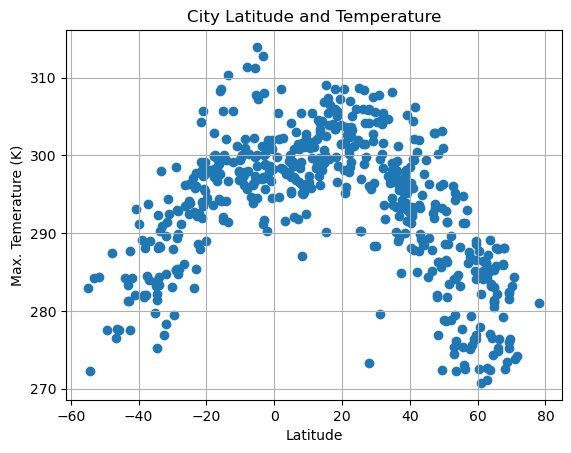

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max. Temerature (K)")
plt.title("City Latitude and Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

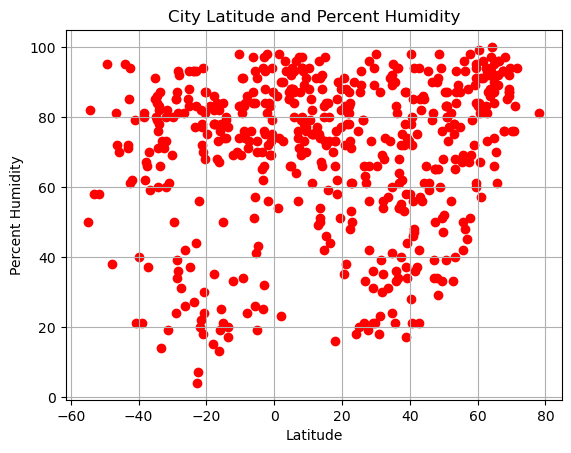

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolors="red", edgecolor="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Percent Humidity")
plt.title("City Latitude and Percent Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

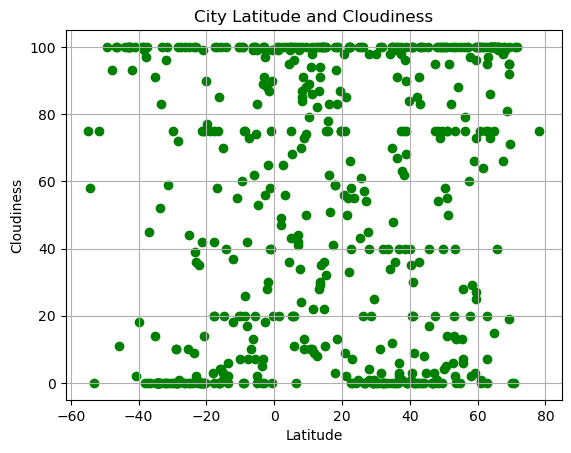

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="green", edgecolor="green")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude and Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

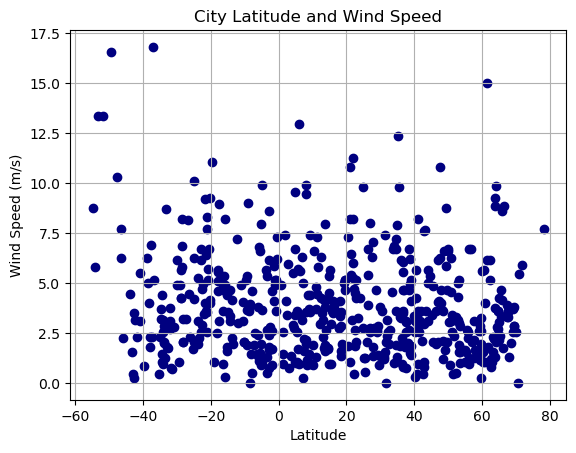

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolors="navy", edgecolors="navy")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude and Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [77]:
# Define a function to create Linear Regression plots
def linear_reg(df, x_col, y_col, color):
    x_val = df[x_col]
    y_val = df[y_col]
    
    #create scatterplot
    plt.scatter(x_val, y_val, facecolor=color, edgecolor=color, label = "Data Points")
    
    #add lables
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Plot and Linear Regression of {x_val} and {y_val}")

    
    #perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_val, y_val)
    regression_line = (slope * x_val) + intercept
    
    #create regression line
    plt.plot(x_val, regression_line, color = "darkgrey", label = "Regression Line, p-value:" + str(round(r_value, 3)))
    
    #show 
    plt.legend()
    plt.show

In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tobruk,32.0836,23.9764,298.39,56,0,2.37,LY,1726517201
3,albany,42.6001,-73.9662,301.99,42,36,0.45,US,1726517159
10,olonkinbyen,70.9221,-8.7187,273.80,83,100,5.44,SJ,1726517099
11,tazacorte,28.6290,-17.9293,295.69,73,20,4.63,ES,1726517211
13,kodiak,57.7900,-152.4072,286.88,51,20,3.09,US,1726517213


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,282.11,86,0,1.05,ZA,1726517199
1,blackmans bay,-43.0167,147.3167,281.22,71,100,0.45,AU,1726517104
4,currumbin waters,-28.1553,153.4613,285.38,92,1,2.06,AU,1726517203
5,pisco,-13.7000,-76.2167,291.49,77,2,4.15,PE,1726517204
6,waitangi,-43.9535,-176.5597,284.16,95,100,4.47,NZ,1726517103


###  Temperature vs. Latitude Linear Regression Plot

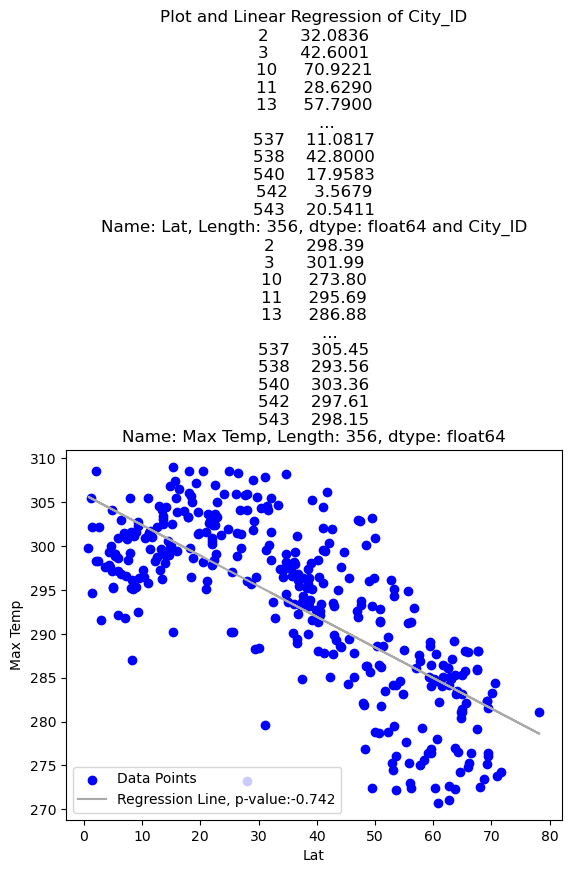

In [80]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df, "Lat", "Max Temp", "blue")

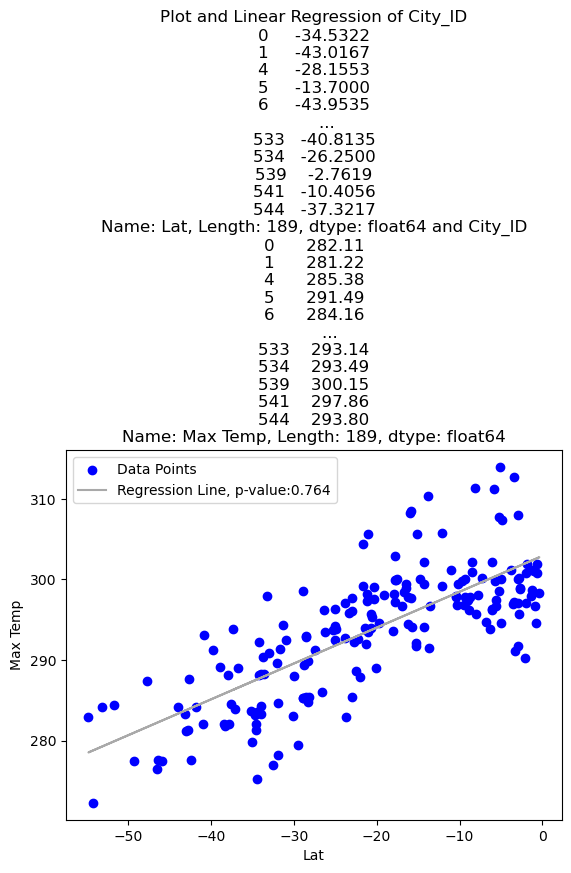

In [81]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df, "Lat", "Max Temp", "blue")

**Discussion about the linear relationship:** Considering both of the graphs for northern and southern hemisphere data regarding maximum temperature, it can be seen that higher temperatures typically occur the closer the latitude is to zero (the equator). For the northern hemisphere, there is a distinct negative correlation (r = -0.742) between positive latitude and maximum temperatures, which means that higher latitudes (further north) will typically have lower maximum temperatures. Alternatively, in the southern hemisphere, there is a distinct positive correlation (r = 0.764) between negative latitude values and maximum temperatures, which means that less-negative latitudes (closer to the equator) will typically have higher temperatures. 

### Humidity vs. Latitude Linear Regression Plot

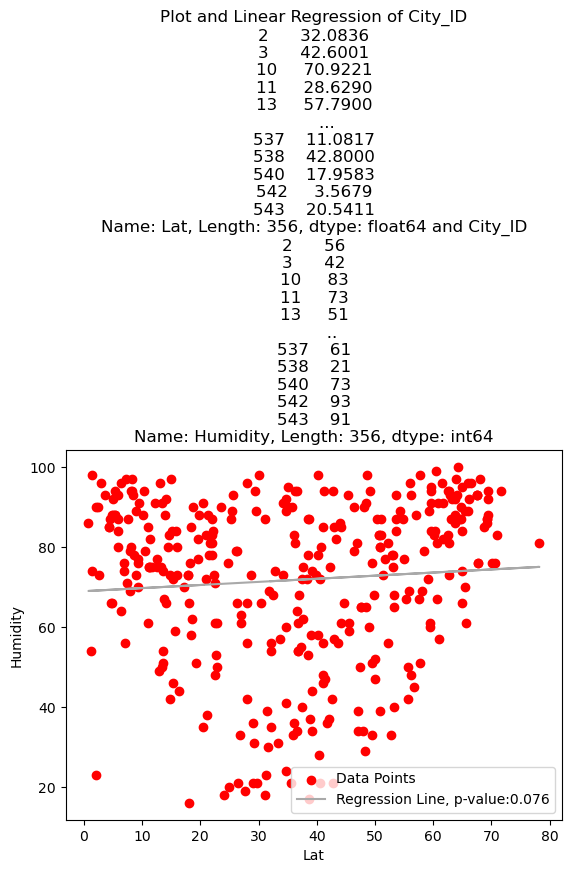

In [82]:
# Northern Hemisphere
linear_reg(northern_hemi_df, "Lat", "Humidity", "red")

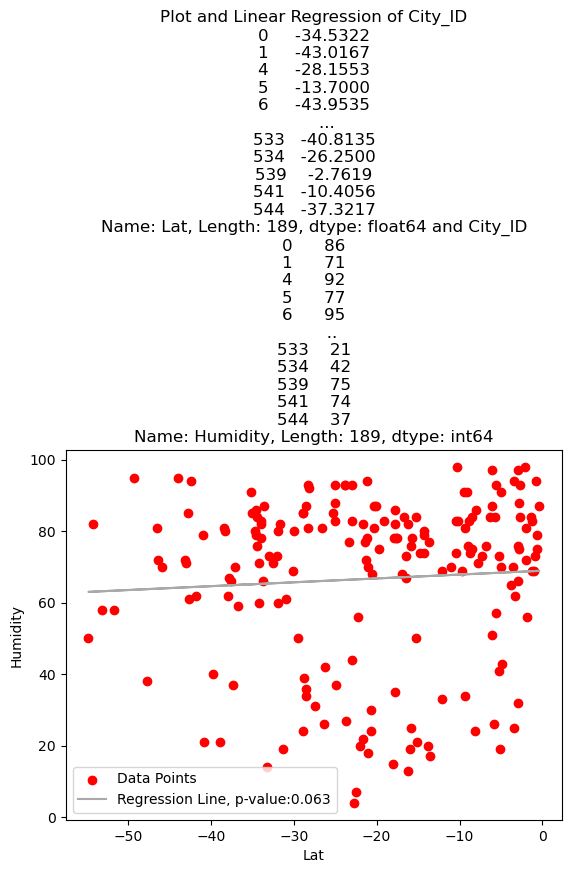

In [83]:
# Southern Hemisphere
linear_reg(southern_hemi_df, "Lat", "Humidity", "red")

**Discussion about the linear relationship:** In both the northern and southern hemisphere, there is a very slightly positive correlation between the latitude and the humidity. Both are very slight positive correlations (Northern r = 0.076, Southern r = 0.063) which may indicate that a hgiher latitude typically corresponds to a higher rate of humidity, although it is quite possible that the latitude of a city does not correlate with the humidty. Further analysis is required. 

### Cloudiness vs. Latitude Linear Regression Plot

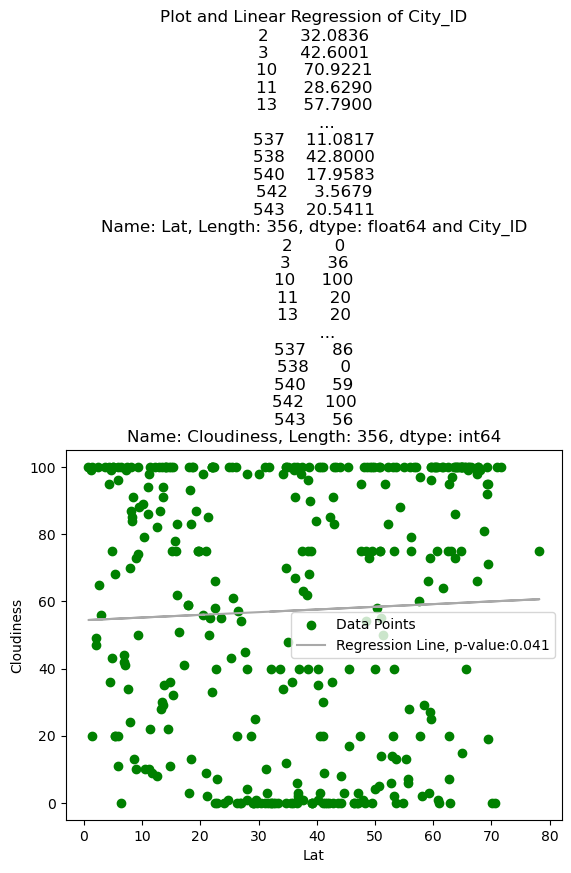

In [84]:
# Northern Hemisphere
linear_reg(northern_hemi_df, "Lat", "Cloudiness", "green")

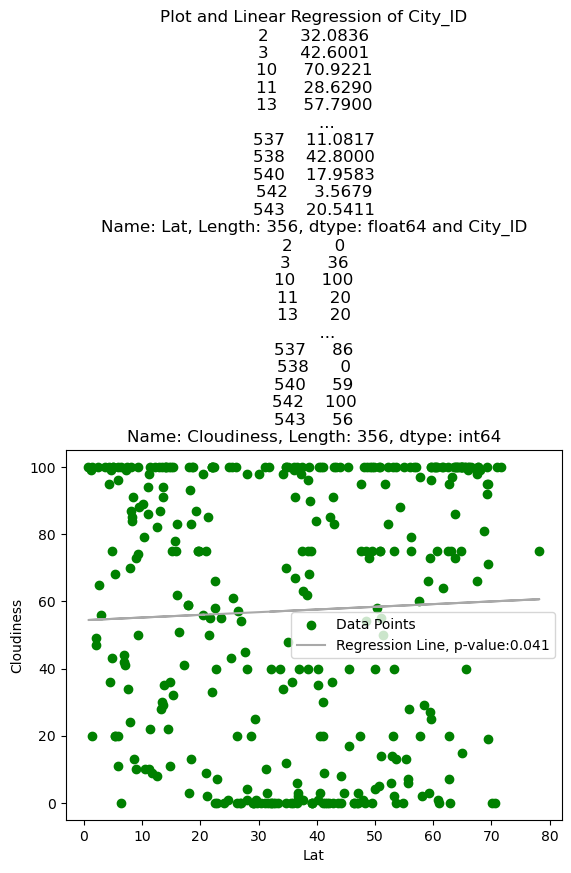

In [85]:
# Southern Hemisphere
linear_reg(northern_hemi_df, "Lat", "Cloudiness", "green")

**Discussion about the linear relationship:** In both the northern and southern hemisphere, there is little to no correlation between the latitude and cloudiness in a given city (r= 0.041 for both graphs). This indicates that the cloudiness of a given city is not related to or dependent on the latitude of that city. 

### Wind Speed vs. Latitude Linear Regression Plot

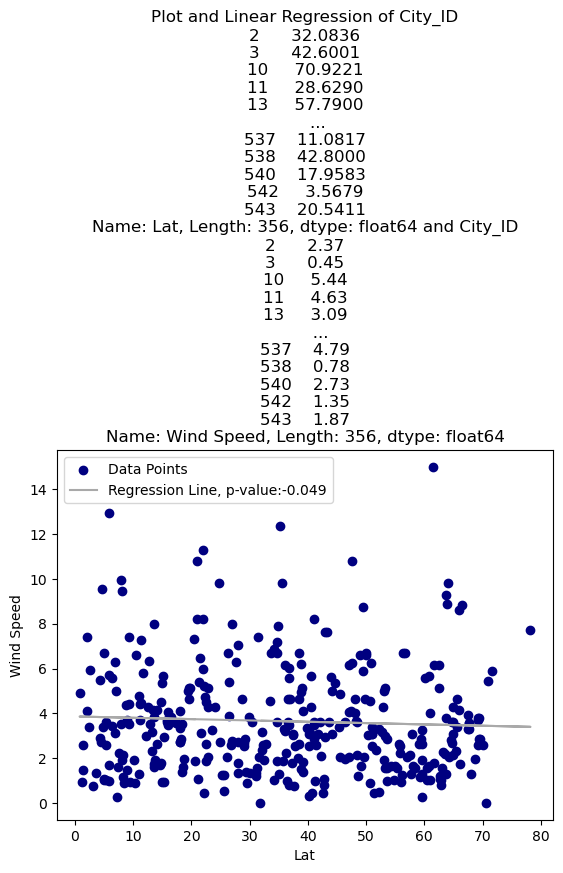

In [86]:
# Northern Hemisphere
linear_reg(northern_hemi_df, "Lat", "Wind Speed", "navy")

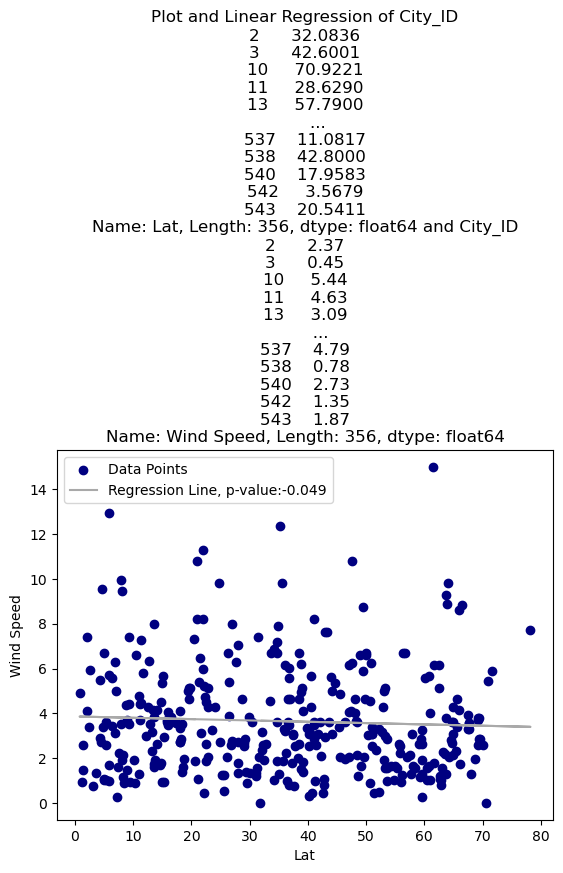

In [87]:
# Southern Hemisphere
linear_reg(northern_hemi_df, "Lat", "Wind Speed", "navy")

**Discussion about the linear relationship:** In both the northern and southern hemisphere, there is little to no correlation between the latitude and the wind speed in a given city (r= -0.049 for both graphs). This indicates that the wind speed of a given city is not related to or dependent on the latitude of that city. 